# Continuous phase-type distribution of branch length

Proxies for internet access on the cluster:

In [1]:
Sys.setenv(http_proxy = "http://proxy-default:3128", 
           https_proxy = "http://proxy-default:3128")

Libraries:

In [2]:
library(tidyverse)
library(cowplot)
library(tidyverse)
library(viridis)
library(scales)
library(extrafont)
library(ggthemes)
library(RColorBrewer)
#display.brewer.all()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Indlæser krævet pakke: viridisLite


Vedhæfter pakke: ‘scales’


Det følgende objekt er maskeret fra ‘package:viridis’:

    viridis_pal


Det følgende objekt er maskeret fra ‘package:purrr’:

    discard


Det følgende objekt er maskeret fra ‘package:readr’:

    col_factor


Registering fonts with R


Vedhæfter pakke: ‘ggthemes’


Det følgende objekt er maskeret fra ‘package:cowplot’:

    theme_map




In [3]:
#font_import()
# loadfonts()

theme_set(theme_minimal() + theme(text=element_text(size=15)))

In [4]:
# theme_set(bw() +
#           theme(text=element_text(size=15,
#                                               # family="Arial"
#                                               ), 
#                              panel.grid.major = element_blank(),
#                              panel.grid.minor = element_blank()
#                             ) 
#          )


In [5]:
despine <- theme(panel.border = element_blank(), axis.line = element_line(colour = "black"))
noframe <- theme(panel.border = element_blank())
options(repr.plot.width=9, repr.plot.height=5)
figsize <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
saveplot <- function(filename) {
    ggsave(filename, width=options()$repr.plot.width, height=options()$repr.plot.height)
}
opts <- options()  # save old options
options(ggplot2.continuous.colour="viridis")
options(ggplot2.continuous.fill = "viridis")

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

options(ggplot2.discrete.colour=cbPalette)
options(ggplot2.discrete.fill=cbPalette)

# options(ggplot2.discrete.colour= c("red", "#af01ef"))
# # options(ggplot2.discrete.colour= list(c("red", "#af01ef"), custom.colors(99)))

# set_default_scale("colour", "discrete", "Set1") 
# set_default_scale("fill", "discrete", "Set1") 

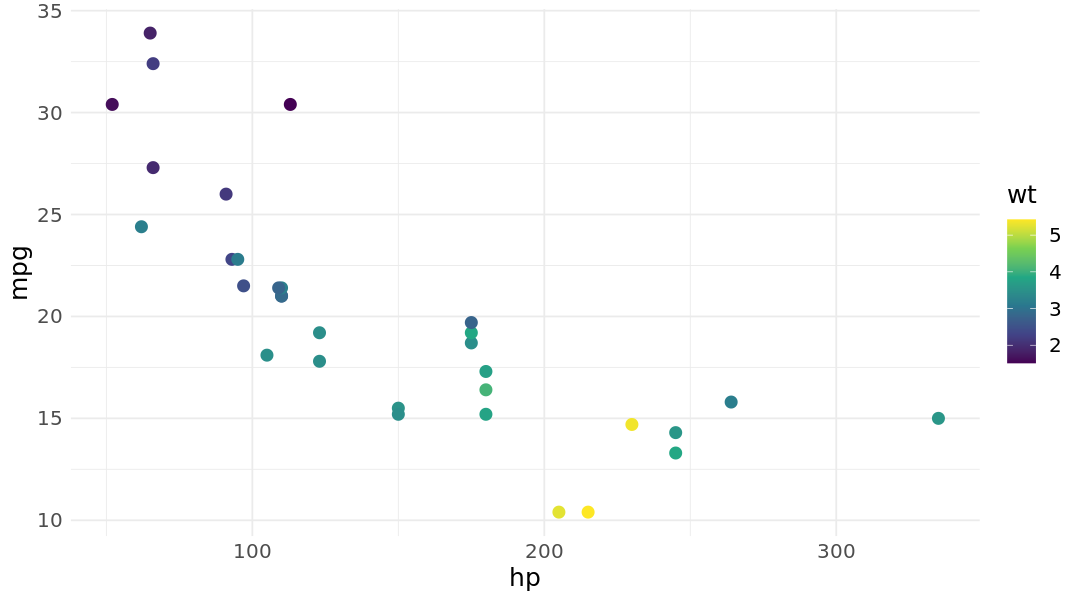

In [6]:
data(mtcars)
ggplot(data = mtcars, aes(x = hp, y = mpg, color = wt )) + 
  geom_point(size=3)# + noframe

Test plot: 

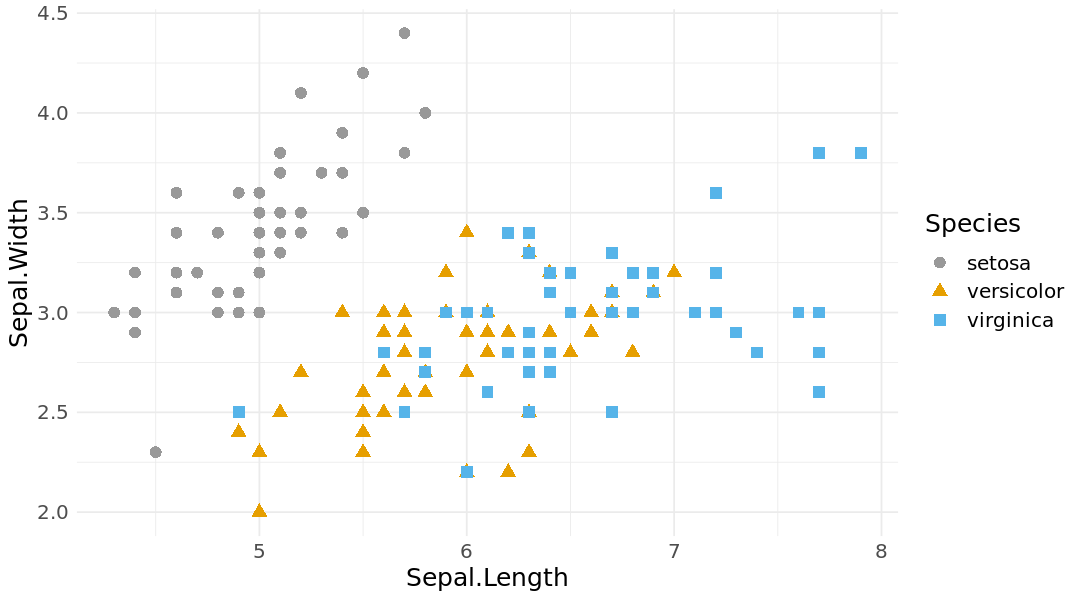

In [7]:
ggplot(data=iris, aes(x = Sepal.Length, y = Sepal.Width)) +
   geom_point(aes(color=Species, shape=Species), size=3)# +    

# PtDAlgorithms

In [8]:
library(devtools)
#remove.packages("ptdalgorithms")
devtools::install_github("TobiasRoikjer/PtDAlgorithms")
library(ptdalgorithms)

Indlæser krævet pakke: usethis

Skipping install of 'ptdalgorithms' from a github remote, the SHA1 (dfc78fe3) has not changed since last install.
  Use `force = TRUE` to force installation



# State space

## State space in R

In [9]:
# %%R -o graph -o states -o ipv -o sim


# r_construct_twolocus_island_graph <- function(s, N, M, R) {

#     # number of populations
#     p <- 2 # needs to be 2
#     # state vector length
#     n <- p*(s+1)**2

#     graph <- create_graph(n)
#     index <- 1
#     # first_vertex <- create_vertex(graph, c(rep(0, s+2), s, rep(0, n-s-3))) # assumes that p=2
#     state <- rep(0, n)
#     state[conf_to_index(s, 1, 1, 1)] <- s
#     first_vertex <- create_vertex(graph, state) # assumes that p=2
#     add_edge(starting_vertex(graph), first_vertex, 1)

#     index <- 2
#     while (index <= vertices_length(graph)) {

#       vertex <- vertex_at(graph, index)
#       state <- vertex$state

#       count <- 0
#       for (i in 1:n) {
#           count <- count + state[i]
#       }
#       if (count <= 1) {
#           # Only one lineage, stop
#           index <- index + 1
#           next
#       }    

#       for (i in 1:n) {
#         conf_i <- index_to_conf(s, i)

#         # coalescence #########################
#         for (j in i:n) {
#           conf_j <- index_to_conf(s, j)

#           if (conf_i@population != conf_j@population) {
#             # different populations
#             next
#           }
#           if (i == j) {
#             if (state[i] < 2) {
#               next;
#             }
#             rate <- state[i] * (state[i] - 1) / 2 / N
#           } else {
#             if (state[i] < 1 || state[j] < 1) {
#               next;
#             }
#             rate <- state[i] * state[j] / N
#           }

#           child_state <- state

#           # lineages with index i and j coalesce:  
#           child_state[i] <- child_state[i] - 1
#           child_state[j] <- child_state[j] - 1
#           stopifnot(conf_i@locus1+conf_j@locus1 <= s)
#           stopifnot(conf_i@locus2+conf_j@locus2 <= s)

#           # coalescene into lineage with index k
#           k = conf_to_index(s, conf_i@locus1+conf_j@locus1, conf_i@locus2+conf_j@locus2, conf_i@population)
#           child_state[k] <- child_state[k] + 1

#           child_vertex <- find_or_create_vertex(graph, child_state)
#           add_edge(vertex, child_vertex, rate)
#         }

#         # recombination #######################
#         if (state[i] > 0 && conf_i@locus1 > 0 && conf_i@locus2 > 0) {

#           rate <- R
#           child_state <- state

#           # a lineage with index i recombines to produce lineages with index k and l
#           k = conf_to_index(s, conf_i@locus1, 0, conf_i@population)
#           l = conf_to_index(s, 0, conf_i@locus2, conf_i@population)
#           child_state[i] <- child_state[i] - 1
#           child_state[k] <- child_state[k] + 1
#           child_state[l] <- child_state[l] + 1

#           child_vertex <- find_or_create_vertex(graph, child_state)
#           add_edge(vertex, child_vertex, rate)
#         }

#         # migration ###########################
#         if (state[i] > 0) {

#           rate <- M
#           child_state <- state

#           if (conf_i@population == 1) {
#             m = 2
#           } else {
#             m = 1
#           }
#           # 
#           k = conf_to_index(s, conf_i@locus1, conf_i@locus2, m)
#           child_state[i] <- child_state[i] - 1
#           child_state[k] <- child_state[k] + 1

#           child_vertex <- find_or_create_vertex(graph, child_state)
#           add_edge(vertex, child_vertex, rate)
#         }
#       }

#       index <- index + 1

#       if ((index %% 50) == 0) {
#         cat(index, vertices_length(graph), "\n")
#       }

#     }
    
#     return(graph)
# }

# graph <- r_construct_twolocus_island_graph(2, 1, 0, 1)

# states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state, simplify = FALSE))
# ipv <- graph_as_matrix(graph)$IPV
# sim <- graph_as_matrix(graph)$SIM

# graph_as_matrix(graph)

## State space in C

In [10]:
Rcpp::sourceCpp("./two_locus_two_island.cpp")

Zero-probability transistions are ignored, so the state space is reduced when either recombination rate or migration rate are zero.

Each state has the following three properties:
1. nr decendants at locus 1
2. nr decendants at locus 2
3. what population the lineage is currently in

Rccp exports `construct_twolocus_island_graph`, `index_to_props`, and `props_to_index`:

Sample size:

In [11]:
s <- 2

# Sanity checks without migration

## ARG TMRCA without migration

The minimum of two independent exponential random variables (the loci are independent with large recombination rate) with parameters $\lambda$ and $\eta$ is also exponential with parameter $\lambda+\eta$. Also:

$$\mathbb{E}[\min(X_1, X_2) + \max(X_1, X_2)] = \mathbb{E}[X_1 + X_2] = \frac{1}{\lambda} + \frac{1}{\eta}$$

Because 

$$\mathbb{E}[\min(X_1, X_2)] = \frac{1}{\lambda + \eta},$$

we get

$$\mathbb{E}[\min(X_1, X_2)] = \frac{1}{\lambda} + \frac{1}{\eta} - \frac{1}{\lambda + \eta}$$

So for a sample of two, and a coalescence rate of 1, the expected time to coalescence at *both* loci is $1 + 1 - \frac{1}{1+1} = 1.5$. The time for the two loci to coalesce is 1. So the total ARG TMRCA should be 2.5:

In [12]:
graph <- construct_twolocus_island_graph(2, 1, 1, 0, 0, 0)
expectation(graph)

[1] 1

In [13]:
graph <- construct_twolocus_island_graph(2, 1, 1, 0, 0, 10000000)
expectation(graph)

[1] 2.5

__*Note for Tobias*__: `expectation` does not like null-edges:

In [14]:
# %%R
# graph <- construct_twolocus_island_graph(2, 1, 1, 0, 0, 10000000, keep_null_edges=TRUE)
# expectation(graph)

## Visualize graph

In [15]:
graph <- construct_twolocus_island_graph(s, 1, 1, 0, 0, 1)

states <- t(sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state ))

parents <- c()
children <- c()
rates <- c()
for (i in 1:vertices_length(graph)) {
    for (edge in edges(vertex_at(graph, i))) {
        parents <- c(parents, i)
        children <- c(children, edge$child$index)
        rates <- c(rates, edge$weight)
    }
}

In [16]:
index_to_props(s, 4)

$locus1
[1] 1

$locus2
[1] 0

$population
[1] 1

## Two-locus SFS without recombination

Expected ARG branches with i and j tons at each locus

In [17]:
s <- 4

graph <- construct_twolocus_island_graph(s, 1, 1, 0, 0, 0)
rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )
print(vertices_length(graph))

exp_mat <- matrix(nrow=s-1,ncol=s-1)
for (i in 1:(s-1)) {
  for (j in 1:(s-1)) {
    exp_mat[i,j] <- expectation(graph, rewards[props_to_index(s, i, j, 1),] + rewards[props_to_index(s, i, j, 2),])
  }
}

[1] 6


In [18]:
exp_mat

2,0,0.0000000
0,1,0.0000000
0,0,0.6666667


In [19]:
# df <- as.data.frame(exp_mat)
# df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
# figsize(7, 5.5)
# ggplot(df, aes(ton1, ton2)) +
#   geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
#   geom_text(aes(label = round(value, 2))) +
#   scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe

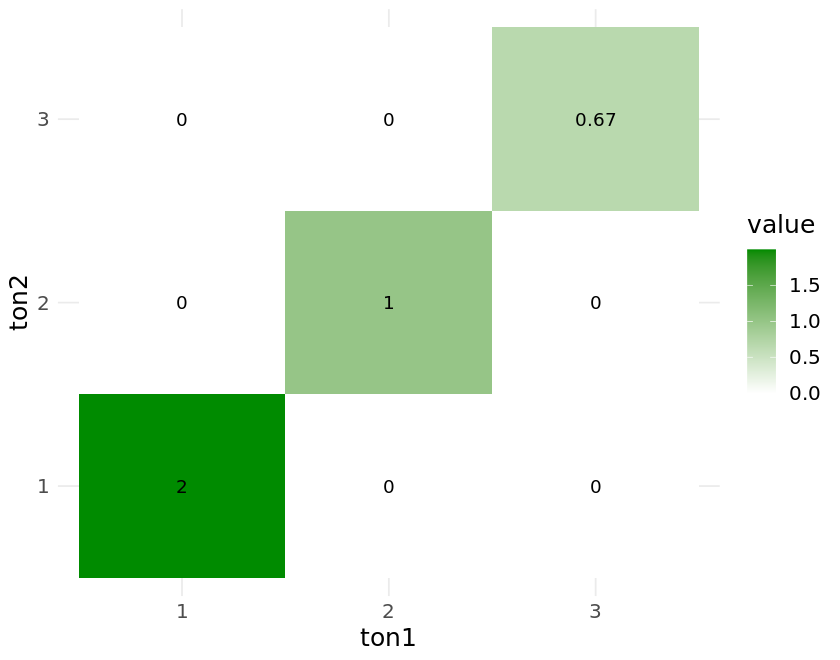

In [20]:
figsize(7, 5.5)
df <- as.data.frame(exp_mat)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", 
                       midpoint = 0, na.value = '#eeeeee')

saveplot('figures/two_locus_sfs_norec.pdf')

## Two-locus SFS with recombination

Expected ARG branches with i and j tons at each locus

In [21]:
s <- 4
graph <- construct_twolocus_island_graph(s, 1, 1, 0, 0, 2)
rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )
print(vertices_length(graph))

exp_mat <- matrix(nrow=s-1,ncol=s-1)
for (i in 1:s-1) {
  for (j in 1:s-1) {
    exp_mat[i,j] <- expectation(graph, rewards[props_to_index(s, i, j, 1),] + rewards[props_to_index(s, i, j, 2),])
  }
}

[1] 110


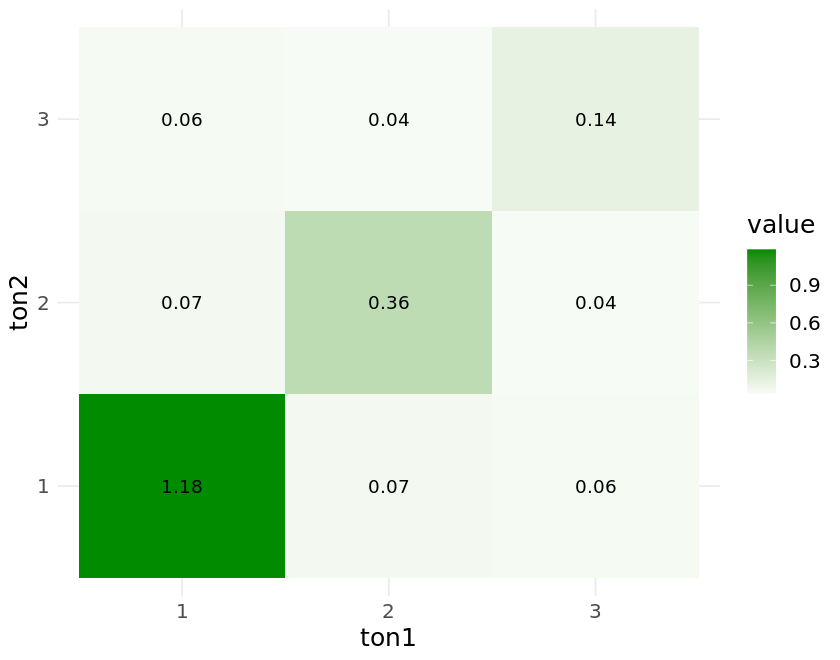

In [22]:
df <- as.data.frame(exp_mat)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
figsize(7, 5.5)
ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) #+ noframe
saveplot('figures/two_locus_sfs.pdf')

Marginal SFSs:

In [23]:
sfs_locus1 <- colSums(exp_mat)
sfs_locus2 <- rowSums(exp_mat)

Fits expectations for a single locus:

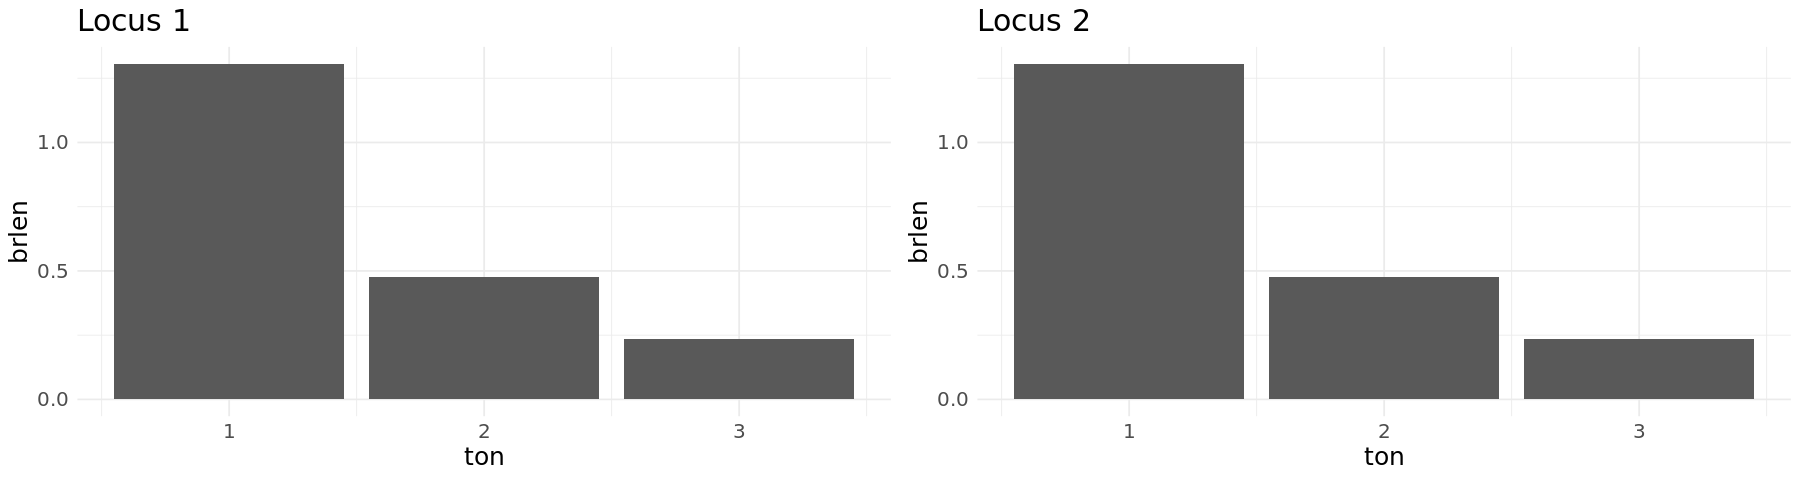

In [24]:
figsize(15, 4)
p1 <- ggplot(data.frame("brlen"=sfs_locus1, "ton"=seq(1, length(sfs_locus1)))) + geom_col(aes(ton, brlen)) + ggtitle('Locus 1')
p2 <- ggplot(data.frame("brlen"=sfs_locus2, "ton"=seq(1, length(sfs_locus2)))) + geom_col(aes(ton, brlen)) + ggtitle('Locus 2')
plot_grid(p1, p2, labels = c("", ""), ncol = 2, nrow = 1)
saveplot('figures/two_locus_marginal_sfs.pdf')

# PDFs of ARG branch length with i descendants at locus one and two at locus two

In [25]:
result = data.frame()
for (i in 1:(s-1)) {
    for (j in 1:(s-1)) {
        x <- seq(from = 0, to = 5, by = 0.01)
        pdf <- dph(x, reward_transform(graph, rewards[props_to_index(s, i, j, 1),]))

        df <- data.frame(prob = pdf, t=x, i_ton=i, j_ton=j, color=100*j+i)
        result <- rbind(result, df)
    }
}
#result %>% ggplot(aes(y=prob, x=t, color=ton, group=ton)) + geom_line(size=1)

In [26]:
head(result)

,prob,t,i_ton,j_ton,color
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0.000000000,0.00,1,1,101
2,0.006860333,0.01,1,1,101
3,0.015161155,0.02,1,1,101
4,0.024125232,0.03,1,1,101
5,0.033701500,0.04,1,1,101
6,0.044883331,0.05,1,1,101


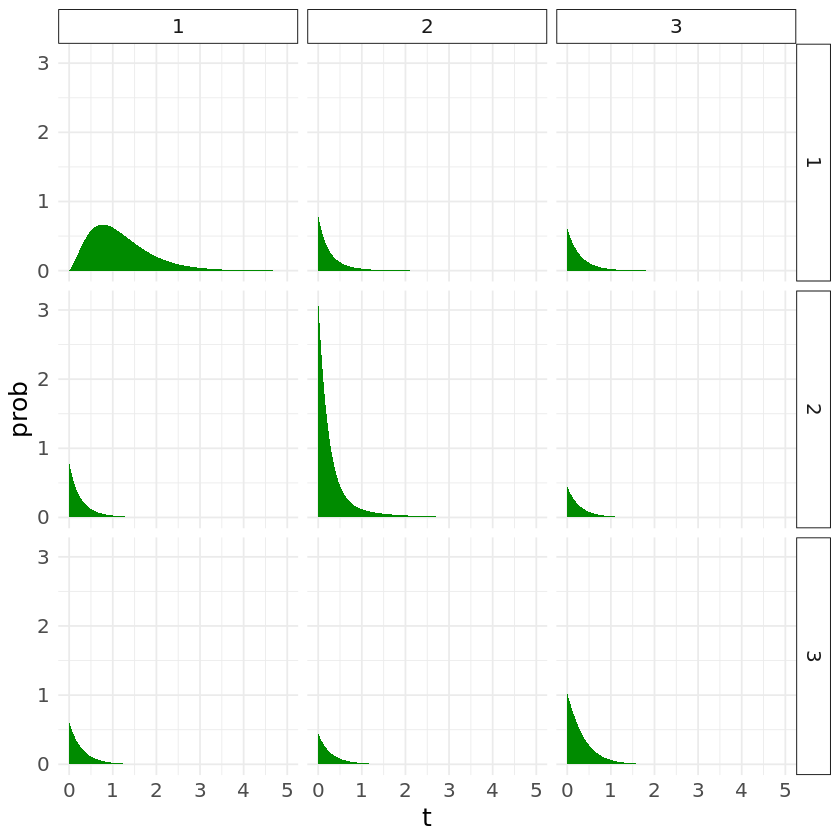

In [27]:
figsize(7, 7)
ggplot(result, aes(x=t, y=prob)) + 
    geom_area(fill='green4') + 
    facet_grid(rows=vars(i_ton), col=vars(j_ton)) +
    theme(strip.background =element_rect(fill="white"))
saveplot('figures/two_locus_marginal_sfs.pdf')

## ARG TMRCA without recombination

Test the classical result that with symmetric migration and sampling from one population, the expectation should be the sum of the two population sizes (2) and independent of the migration rate. The variance is not and should fall with higher migration rate and asymptotically reach (4):

In [28]:
graph <- construct_twolocus_island_graph(2, 1, 1, 10000000000, 10000000000, 0)
variance(graph)

[1] 4

In [29]:
expectation_migrates <- c()
variance_migrates <- c()
mig_rates <- 10^(-5:5)
for (mig_rate in mig_rates) {
    graph <- construct_twolocus_island_graph(2, 1, 1, mig_rate, mig_rate, 0)
    expectation_migrates <- c(expectation_migrates, expectation(graph))
    variance_migrates <- c(variance_migrates, variance(graph))   
}

In [30]:
df <- data.frame(mig_rate=mig_rates, 
       mean=expectation_migrates,
       var=variance_migrates)
df

mig_rate,mean,var
<dbl>,<dbl>,<dbl>
1e-05,2,1.00004e+05
1e-04,2,1.00040e+04
1e-03,2,1.00400e+03
1e-02,2,1.04000e+02
1e-01,2,1.40000e+01
1e+00,2,5.00000e+00
1e+01,2,4.10000e+00
1e+02,2,4.01000e+00
1e+03,2,4.00100e+00


In [31]:
df <- gather(df, 'stat', 'value', -c(mig_rate))
df

mig_rate,stat,value
<dbl>,<chr>,<dbl>
1e-05,mean,2.00000e+00
1e-04,mean,2.00000e+00
1e-03,mean,2.00000e+00
1e-02,mean,2.00000e+00
1e-01,mean,2.00000e+00
1e+00,mean,2.00000e+00
1e+01,mean,2.00000e+00
1e+02,mean,2.00000e+00
1e+03,mean,2.00000e+00


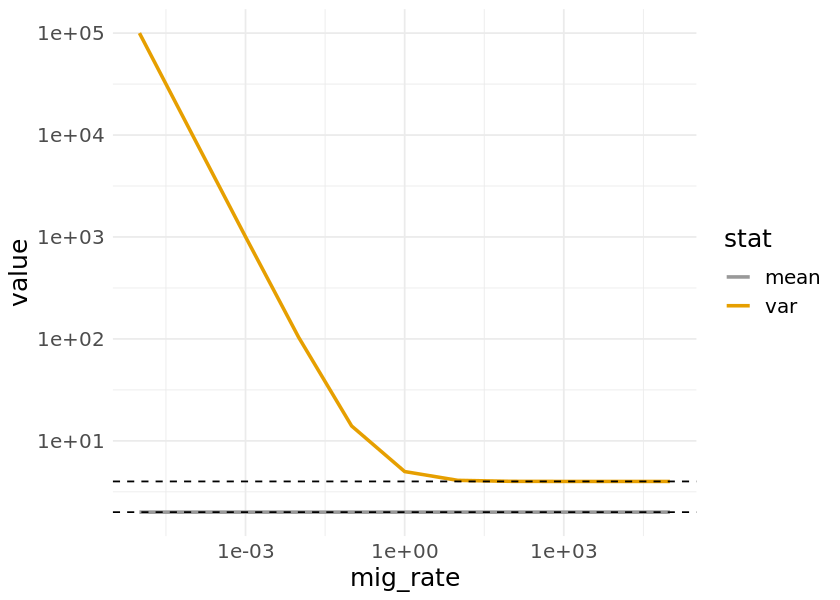

In [32]:
figsize(7, 5)
ggplot(df, aes(x=mig_rate,y=value,color=stat)) + 
           geom_line(size=1) +
           scale_x_continuous(trans='log10') +
           scale_y_continuous(trans='log10') +
           geom_hline(yintercept = 4, linetype=2) +
           geom_hline(yintercept = 2, linetype=2)
saveplot('figures/mean_and_var_by_migrate.pdf')

# Distribution of number of outgoing edes

In [33]:
s <- 6

In [34]:
figsize(7, 5)
graph <- construct_twolocus_island_graph(s, 1, 1, 0, 0, 1)
print(vertices_length(graph))
si <- sign(graph_as_matrix(graph)$SIM)
diag(si) <- 0
outgoing_edge_counts <- rowSums(si)
# qplot(outgoing_edge_counts)

[1] 1044


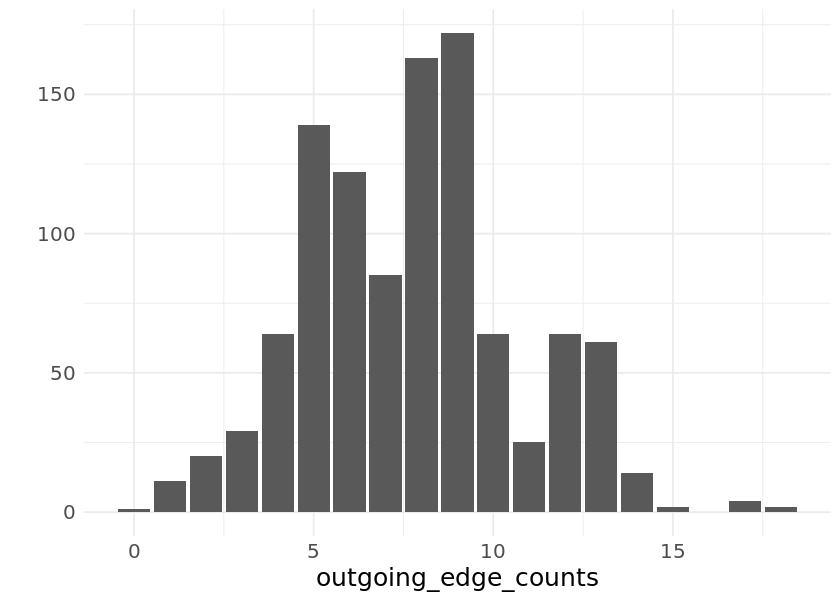

In [35]:
qplot(outgoing_edge_counts, geom='bar')

# Two-locus SFS

Expected ARG branches with i and j tons at each locus

In [36]:
# %%R -o s
# s <- 4

No migration:

In [37]:
# %%R
# graph <- construct_twolocus_island_graph(s, 1, 1, 1, 1, 1)
# rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )
# vertices_length(graph)

In [38]:
# %%R

# library(foreach)
# foreach (i=1:3) %do% {
#   sqrt(i)
# }

In [39]:
broadcast_props_to_index <- function(s, a, b, p) {
    return((p-1)*(s + 1)**2 + a*(s + 1) + b + 1)
}

two_locus_expectation <- function(s, N, M, R) 
{
    graph <- construct_twolocus_island_graph(s, N, N, M, M, R)
    rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )

    exp_mat <- matrix(nrow=s+1,ncol=s+1)
    for (i in 0:s) {
      for (j in 0:s) {
        exp_mat[i+1,j+1] <- expectation(graph, rewards[props_to_index(s, i, j, 1),] + rewards[props_to_index(s, i, j, 2),])
      }
    }
    return(exp_mat)
} 

In [40]:
exp_mat <- two_locus_expectation(s, 1, 1, 1)
exp_mat

0.0000000,1.11414254,0.83875209,0.66236776,0.56096603,0.49571161,1.3170671
1.1141425,2.06069441,0.10381944,0.07931653,0.05190836,0.04708094,0.1069803
0.8387521,0.10381944,0.76137927,0.08150143,0.06143870,0.03696461,0.1063918
0.6623678,0.07931653,0.08150143,0.38358502,0.05768776,0.04077732,0.1066635
0.5609660,0.05190836,0.06143870,0.05768776,0.21917256,0.04321406,0.1149075
0.4957116,0.04708094,0.03696461,0.04077732,0.04321406,0.14602283,0.1255997
1.3170671,0.10698025,0.10639182,0.10666349,0.11490751,0.12559967,0.0000000


In [41]:
# %%R -o exp_mat
# exp_mat <- matrix(nrow=s+1,ncol=s+1)
# for (i in 0:s) {
#   for (j in 0:s) {
#     exp_mat[i+1,j+1] <- expectation(graph, rewards[props_to_index(s, i, j, 1),] + rewards[props_to_index(s, i, j, 2),])
#   }
# }

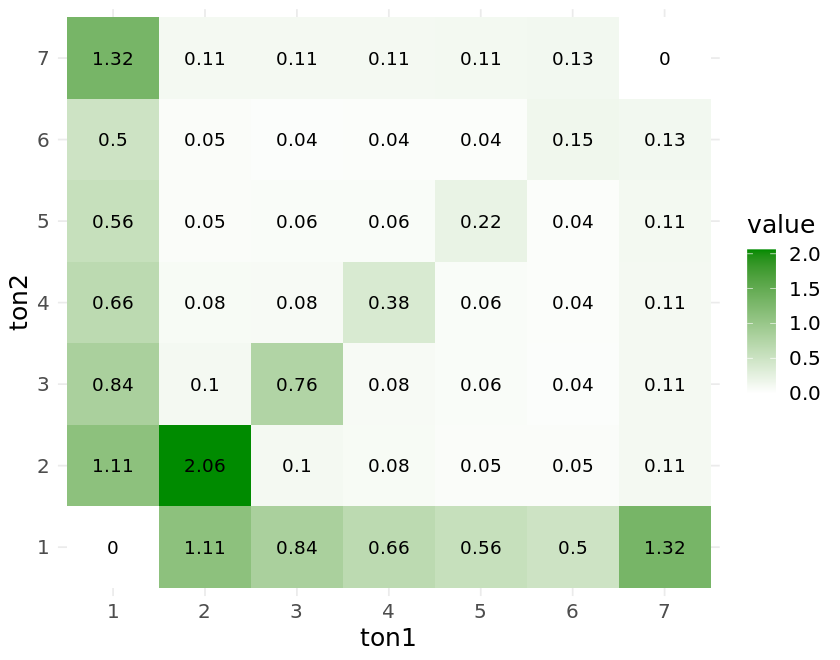

In [42]:
figsize(7, 5)
df <- as.data.frame(exp_mat)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
figsize(7, 5.5)
ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe
saveplot('figures/two_locus_sfs_exp.pdf')

# Covriance between tons at locus one

In [43]:
broadcast_props_to_index <- function(s, a, b, p) {
    return((p-1)*(s + 1)**2 + a*(s + 1) + b + 1)
}

ton_covariance_within_locus <- function(s, N, M, R) 
{
    graph <- construct_twolocus_island_graph(s, N, N, M, M, R)
    rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )

    locus1_rewards <- function(i) {
        colSums(rewards[broadcast_props_to_index(s, i, 1:s, 1),]) + colSums(rewards[broadcast_props_to_index(s, i, 1:s, 2),])
    }

    fun <- function(a, b) mapply(function(i, j) covariance(graph, locus1_rewards(i), locus1_rewards(j)), a, b)
    cov_mat <- outer(1:(s-1), 1:(s-1), fun)
    return(cov_mat)
}    

No migration and no recombination:

In [44]:
cov_mat_no_mig <- ton_covariance_within_locus(s, 1, 0, 0) 

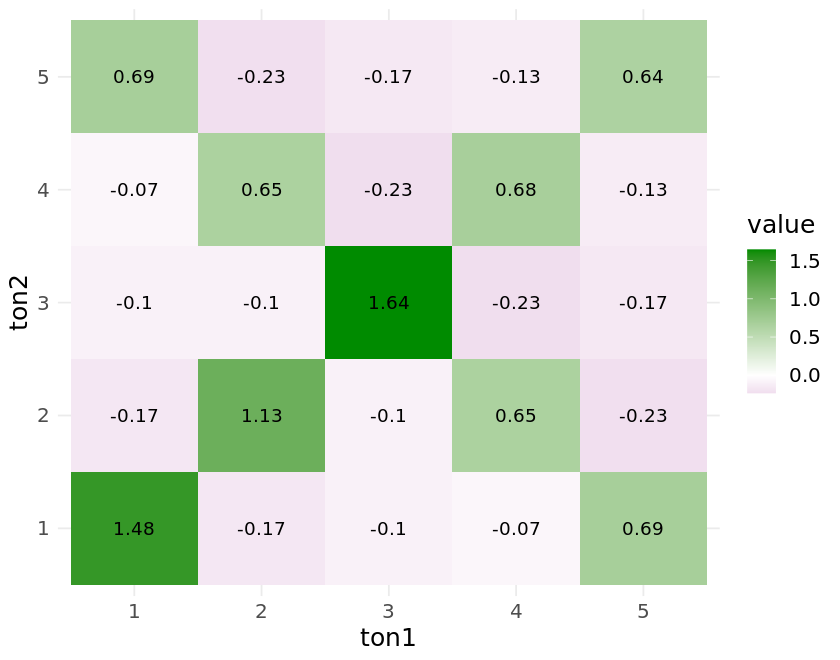

In [45]:
figsize(7, 5)
df <- as.data.frame(cov_mat_no_mig)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
figsize(7, 5.5)
ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe
saveplot('figures/two_locus_sfs_cov_locus1.pdf')

# Covriance between tons between loci

In [46]:
broadcast_props_to_index <- function(s, a, b, p) {
    return((p-1)*(s + 1)**2 + a*(s + 1) + b + 1)
}

ton_covariance_between_loci <- function(s, N, M, R) 
{
    graph <- construct_twolocus_island_graph(s, N, N, M, M, R)
    rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )

    locus1_rewards <- function(i) {
        colSums(rewards[broadcast_props_to_index(s, i, 1:s, 1),]) + colSums(rewards[broadcast_props_to_index(s, i, 1:s, 2),])
    }
    locus2_rewards <- function(j) {
        colSums(rewards[broadcast_props_to_index(s, 1:s, j, 1),]) + colSums(rewards[broadcast_props_to_index(s, 1:s, j, 2),])
    }

    fun <- function(a, b) mapply(function(i, j) covariance(graph, locus1_rewards(i), locus2_rewards(j)), a, b)
    cov_mat <- outer(1:(s-1), 1:(s-1), fun)
    return(cov_mat)
}    

No migration and no recombination:

In [47]:
cov_mat_no_rec_no_mig <- ton_covariance_between_loci(s, 1, 0, 0) 

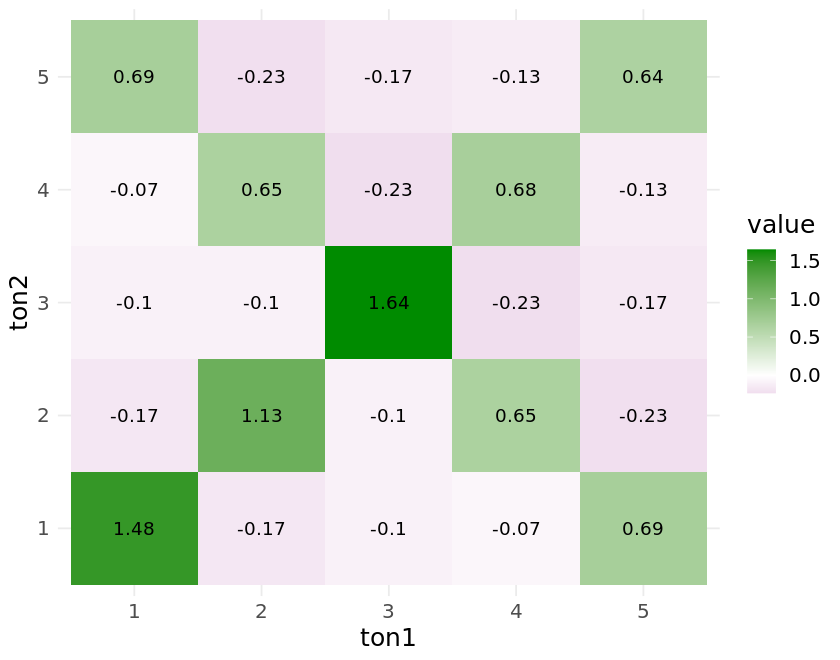

In [48]:
df <- as.data.frame(cov_mat_no_mig)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
figsize(7, 5.5)
ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe
saveplot('figures/two_locus_cov_no_mig_no_rec.pdf')

With recombination:

In [49]:
#%%R -o cov_mat_no_mig

In [50]:
# plt.subplots(1, 1, figsize=(7, 5))
# ticks = list(range(1,int(s)))
# ax = sns.heatmap(cov_mat_no_mig, cmap="PiYG", 
#                 annot=True,
#                 center=0,
#                 yticklabels=ticks,
#                 xticklabels=ticks
#                 )
# ax.invert_yaxis()

In [51]:
cov_mat_no_mig <- ton_covariance_between_loci(s, 1, 0, 1) 
cov_mat_low_rec <- ton_covariance_between_loci(s, 1, 0, 0.1) 

In [52]:
cov_mat_mig <- ton_covariance_between_loci(s, 1, 0.1, 1) 

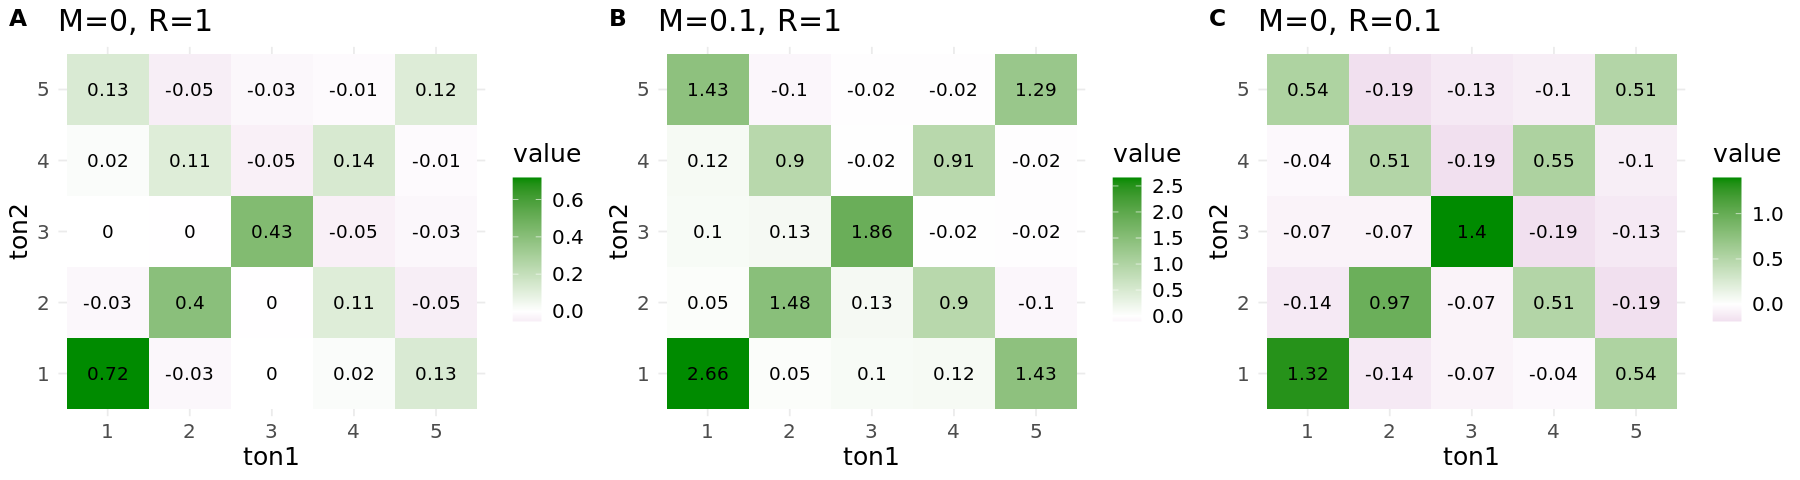

In [53]:
figsize(15, 4)

df <- as.data.frame(cov_mat_no_mig)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
p1 <- ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) +
  ggtitle('M=0, R=1') + noframe

df <- as.data.frame(cov_mat_mig)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
p2 <- ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) +
  ggtitle('M=0.1, R=1') + noframe

df <- as.data.frame(cov_mat_low_rec)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
p3 <- ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) +
  ggtitle('M=0, R=0.1') + noframe

library("cowplot")
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, nrow = 1)
saveplot('figures/two_locus_cov.pdf')

# Covariance of ARG branches in the two populations

Covariance of two-locus "ton" branch length (e.g. singletons at locus 1 and doubletons at locus 2) spent in each population.

In [54]:
graph <- construct_twolocus_island_graph(s, 1, 1, 1, 1, 1)
rewards <- sapply(1:vertices_length(graph), function(index) vertex_at(graph, index)$state )

In [55]:
fun <- function(a, b) mapply(function(i, j) covariance(graph, rewards[props_to_index(s, i, j, 1),], rewards[props_to_index(s, i, j, 2),]), a, b)
cov_mat <- outer(1:(s-1), 1:(s-1), fun)

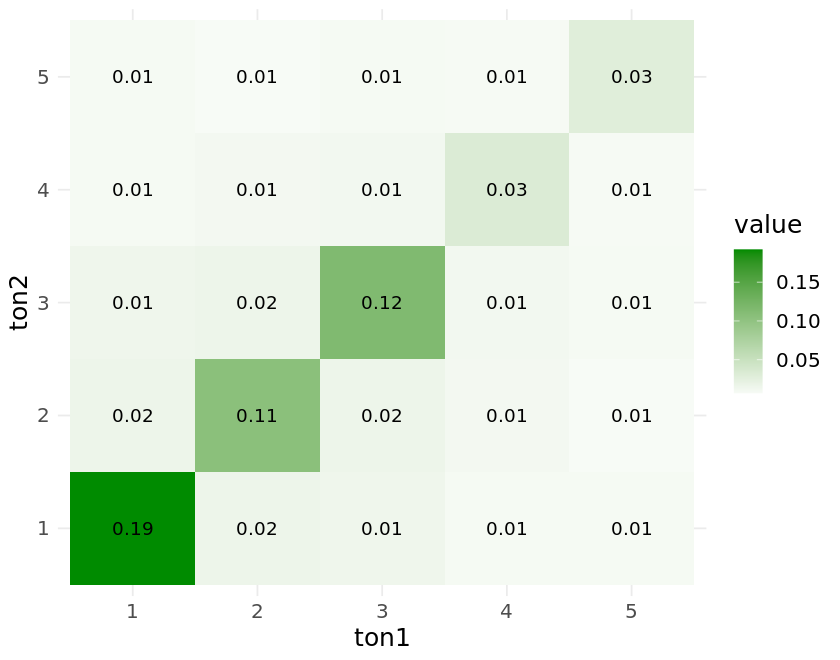

In [56]:
figsize(7, 5.5)
df <- as.data.frame(cov_mat)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))
ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  geom_text(aes(label = round(value, 2))) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe
saveplot('figures/branch_pop_cov.pdf')

Shows that when there are hte same number of decendants at each locus (mostly becuase of no recombination) then the covariance is highest. Mostly for small tons where there are many lineages to back and forth between popoulations.

In [57]:
# %%R

# setClass("conf", slots=list(locus1="numeric", locus2="numeric", population="numeric"))

# obj <- new("conf", locus1=3, locus2=2, population=1)
# obj@population

# r_index_to_props <- function(s, i) {
#     #' returns the locus1, locus2, population
#     #' conformation of lineages represented by
#     #' state vector index i.
#     stopifnot(i > 0)
#     d <- s + 1 # dim
#     idx <- i - 1
#     p <- idx %/% d**2
#     stopifnot(i <= 2*d**2)
#     a <- (idx - p*d**2) %/% d
#     b <- (idx - p*d**2) %% d
#     return(new("conf", locus1=a, locus2=b, population=p+1))
# }
# r_props_to_index <- function(s, a, b, p) {
#     #' returns the state vector index representing
#     #' the locus1, locus2, population conformation.
#     d <- s + 1
#     i = (p-1)*d**2 + a*d + b + 1
#     return(i)
# }

In [76]:
s <- 4
expected_cov_mat <- ton_covariance_between_loci(s, 1, 0.5, 2)
# expected_cov_mat <- (expected_cov_mat - mean(expected_cov_mat)) / sd(expected_cov_mat)

expected_exp_mat <- two_locus_expectation(s, 1, 0.5, 2)
# expected_exp_mat <- (expected_exp_mat - mean(expected_exp_mat)) / sd(expected_exp_mat)


fit <- function(N, M) {
    observed_cov_mat <- ton_covariance_between_loci(s, N, M, 2)
    # observed_cov_mat <- (observed_cov_mat - mean(observed_cov_mat)) / sd(observed_cov_mat)
    
    observed_exp_mat <- two_locus_expectation(s, N, M, 2)
    # observed_exp_mat <- (observed_exp_mat - mean(observed_exp_mat)) / sd(observed_exp_mat)
    
    cov_fit <- abs(sum((observed_cov_mat - expected_cov_mat) / expected_cov_mat, na.rm=TRUE))
    exp_fit <- abs(sum((observed_exp_mat - expected_exp_mat) / expected_exp_mat, na.rm=TRUE))
    return(exp_fit + cov_fit)
}

n <- seq(0.5, 1.5, 0.05)
m <- seq(0.1, 1.1, 0.05)
params <- expand.grid(n, m)
fit_mat <- matrix(mapply(fit, params$Var1, params$Var2), nrow=length(n),ncol=length(m))

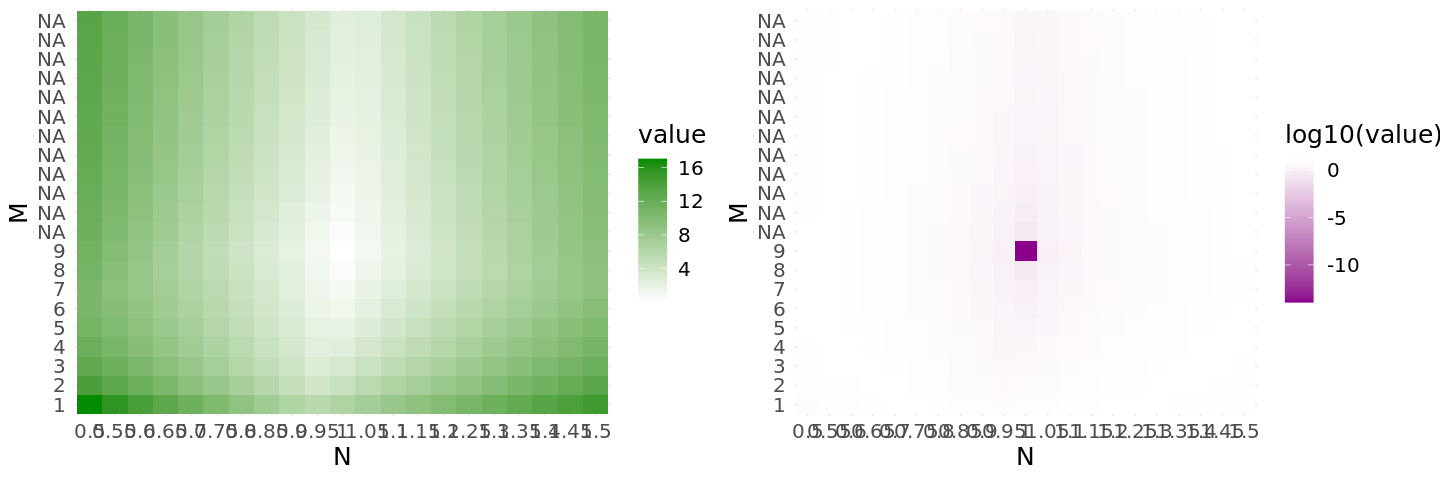

In [77]:
figsize(12, 4)

df <- as.data.frame(fit_mat)
colnames(df) <- round(m, 2)
rownames(df) <- round(n, 2)
df <- df %>% rownames_to_column('N') %>% gather('M', 'value', -c(N))

p1 <- ggplot(df, aes(N, M)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe

p2 <- ggplot(df, aes(N, M)) +
  geom_tile(aes(fill = log10(value))) + scale_y_discrete(labels= seq(1, 9)) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 1) + noframe

plot_grid(p1, p2, labels = c("", ""), ncol = 2, nrow = 1)
saveplot('figures/param_fit.pdf')

## Multiprocessing

In [78]:
library(parallel)

apply_grid <- function(fun, a, b) {
    named_params <- expand.grid(a, b)
    param_list <- split(named_params, seq(nrow(named_params)))    
    result_list <- mclapply(param_list, function(x) do.call(fit, as.list(as.vector(unlist(x)))), mc.cores=10L)
    fit_mat <- matrix(unlist(result_list), nrow=length(a),ncol=length(b))
    return(fit_mat)
}

s <- 4
expected_cov_mat <- ton_covariance_between_loci(s, 1, 0.5, 2)
expected_exp_mat <- two_locus_expectation(s, 1, 0.5, 2)

# fit <- function(N, M) {
#     observed_cov_mat <- ton_covariance_between_loci(s, N, M, 2)
#     return( abs(sum((observed_cov_mat - expected_cov_mat) / expected_cov_mat)) )
# }
n <- seq(0.5, 2.5, 0.05)
m <- seq(0.01, 2.01, 0.05)
fit_mat <- apply_grid(fit, n, m)

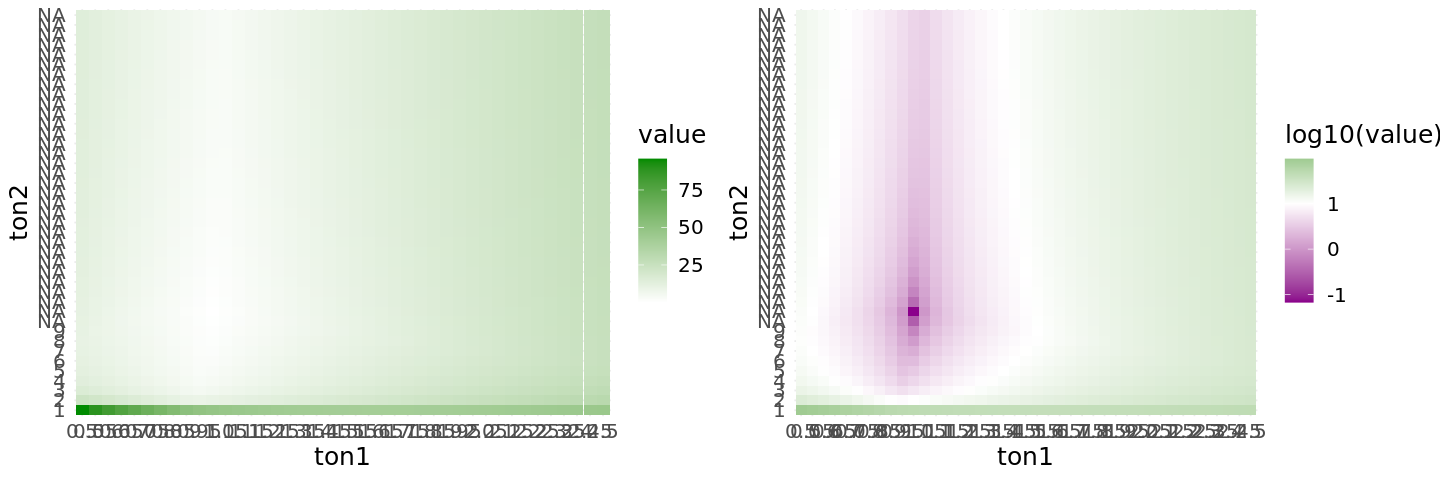

In [79]:
figsize(12, 4)

df <- as.data.frame(fit_mat)
colnames(df) <- round(m, 2)
rownames(df) <- round(n, 2)
df <- df %>% rownames_to_column('ton1') %>% gather('ton2', 'value', -c(ton1))

p1 <- ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = value)) + scale_y_discrete(labels= seq(1, 9)) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 0) + noframe

p2 <- ggplot(df, aes(ton1, ton2)) +
  geom_tile(aes(fill = log10(value))) + scale_y_discrete(labels= seq(1, 9)) +
  scale_fill_gradient2(low = "magenta4", high = "green4", midpoint = 1) + noframe

plot_grid(p1, p2, labels = c("", ""), ncol = 2, nrow = 1)
saveplot('figures/param_fit_multiprocessing.pdf')